In [1]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_graph(df, target_column='WAF'):
    df = df.copy()

    if target_column not in df.columns:
        raise ValueError(f"'{target_column}' 컬럼이 DataFrame에 존재하지 않습니다.")

    workloads = sorted(df['workload'].unique())
    configs = sorted(df['config'].unique())

    # 파스텔 색상 목록 (필요시 확장 가능)
    colors = ['skyblue', 'lightpink', 'lightgreen', 'plum', 'gold']

    # subplot 개수 설정
    n = len(workloads)
    fig, axs = plt.subplots(1, n, figsize=(5 * n, 5), sharey=True)

    if n == 1:
        axs = [axs]

    for i, workload in enumerate(workloads):
        ax = axs[i]
        subset = df[df['workload'] == workload]
        means = subset.groupby('config')[target_column].mean().reindex(configs)

        bars = ax.bar(configs, means, color=[colors[j % len(colors)] for j in range(len(configs))])
        ax.set_title(f'Workload: {workload}')
        ax.set_xlabel('Config')
        ax.grid(True, axis='y', linestyle='--', alpha=0.6)

        # 막대 위에 수치 표시
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{height:.2f}',
                    ha='center', va='bottom', fontsize=9)

        if i == 0:
            ax.set_ylabel(target_column)

    plt.tight_layout()
    plt.show()

In [2]:
def plot_graph2(df):
    df = df.copy()

    # write와 관련된 컬럼들
    write_columns = [
        'rocksdb.flush.write.bytes', 
        'rocksdb.compact.write.bytes', 
        'rocksdb.bytes.written'
    ]
    
    workloads = sorted(df['workload'].unique())
    configs = sorted(df['config'].unique())

    # 파스텔 색상 목록 (필요시 확장 가능)
    colors = ['skyblue', 'lightpink', 'lightgreen', 'plum', 'gold']

    # subplot 개수 설정
    n = len(workloads)
    fig, axs = plt.subplots(1, n, figsize=(5 * n, 5), sharey=True)

    if n == 1:
        axs = [axs]

    for i, workload in enumerate(workloads):
        ax = axs[i]
        subset = df[df['workload'] == workload]
        
        # 각 write 컬럼에 대해 평균값을 계산하여 그리기
        means = subset[write_columns].groupby(df['config']).mean().reindex(configs)

        # 각 write 컬럼에 대해 막대그래프 그리기
        width = 0.2  # 막대의 너비
        x = range(len(configs))  # X축 위치
        bar_width = width * len(write_columns)  # 막대의 너비를 설정
        
        for j, column in enumerate(write_columns):
            ax.bar(
                [pos + j * width - bar_width/2 for pos in x],  # 막대의 위치 설정
                means[column], 
                width=width, 
                label=column,
                color=colors[j % len(colors)]
            )
        
        ax.set_title(f'Workload: {workload}')
        ax.set_xlabel('Config')
        ax.set_xticks(x)  # X축에 config명 표시
        ax.set_xticklabels(configs)  # 각 config에 대한 레이블 설정
        ax.grid(True, axis='y', linestyle='--', alpha=0.6)
        ax.legend()

        if i == 0:
            ax.set_ylabel('Write Bytes')

    plt.tight_layout()
    plt.show()

In [3]:
import pandas as pd

df = pd.read_csv('modified_h1_output.csv')
df

,workload,compaction_style,config,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,WAF,latency,throughput_ops,throughput_bytes
0,fillrandom,leveled,perf,100000,1641700000,141354496,823240788,0,0,0.587559,171.493,5831.0,91.2
1,overwrite,fifo,stable,100000,1641700000,0,856930432,1641700000,100000,0.521977,133.894,7468.0,116.8
2,fillrandom,leveled,stable,100000,1641700000,1063040346,823101149,1641700000,100000,1.148895,224.795,4448.0,69.6
3,fillrandom,fifo,perf,100000,1641700000,0,822797396,0,0,0.501186,131.218,7620.0,119.2
4,fillrandom,universal,stable,100000,1641700000,1002593258,822519262,1641700000,100000,1.111721,243.944,4099.0,64.1
5,overwrite,universal,stable,100000,1641700000,1001390441,822601511,1641700000,100000,1.111039,249.902,4001.0,62.6
6,overwrite,fifo,perf,100000,1641700000,0,822333524,0,0,0.500904,146.222,6838.0,107.0
7,readwhilewriting,fifo,stable,3419,56129723,0,0,56129723,3419,0.000000,1.094,3652834.0,845.6
8,fillrandom,universal,perf,100000,1641700000,303681536,858545886,0,0,0.707941,269.884,3705.0,58.0
9,readwhilewriting,universal,stable,5113,83940121,0,0,83940121,5113,0.000000,1.718,2325338.0,755.4


## Universal

In [4]:
universal = df[df['compaction_style'] == 'universal']
universal

,workload,compaction_style,config,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,WAF,latency,throughput_ops,throughput_bytes
4,fillrandom,universal,stable,100000,1641700000,1002593258,822519262,1641700000,100000,1.111721,243.944,4099.0,64.1
5,overwrite,universal,stable,100000,1641700000,1001390441,822601511,1641700000,100000,1.111039,249.902,4001.0,62.6
8,fillrandom,universal,perf,100000,1641700000,303681536,858545886,0,0,0.707941,269.884,3705.0,58.0
9,readwhilewriting,universal,stable,5113,83940121,0,0,83940121,5113,0.000000,1.718,2325338.0,755.4
10,overwrite,universal,perf,100000,1641700000,320281088,858279646,0,0,0.717890,264.573,3779.0,59.1
11,readwhilewriting,universal,perf,8035,131910595,0,35846789,0,0,0.271751,1.884,456796.0,305.0


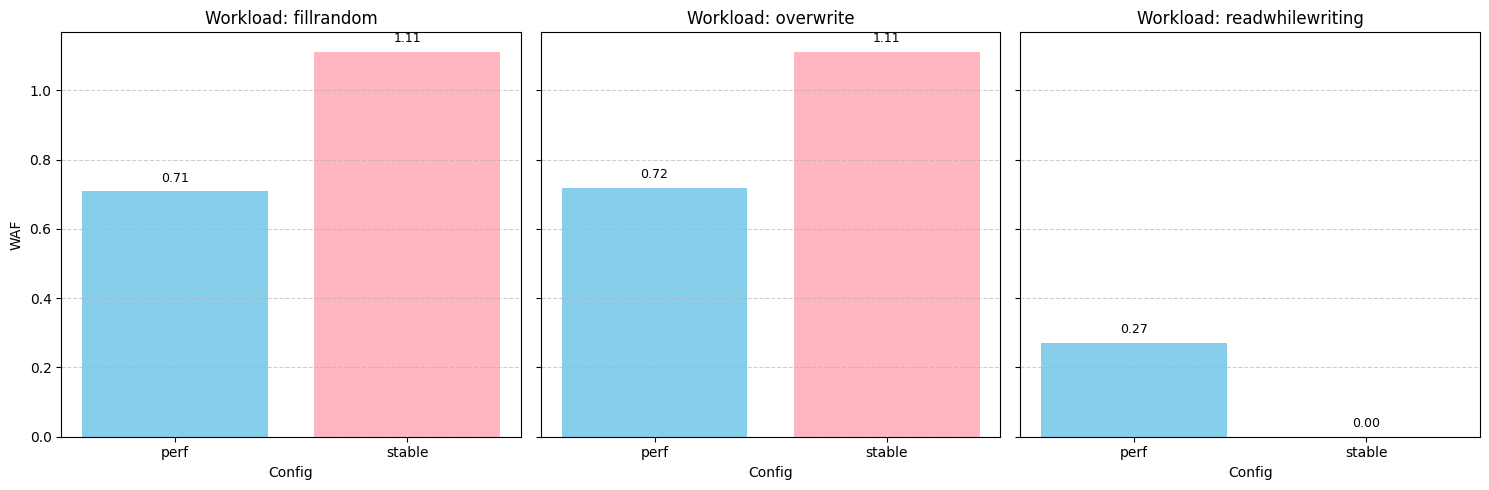

In [5]:
plot_graph(universal)

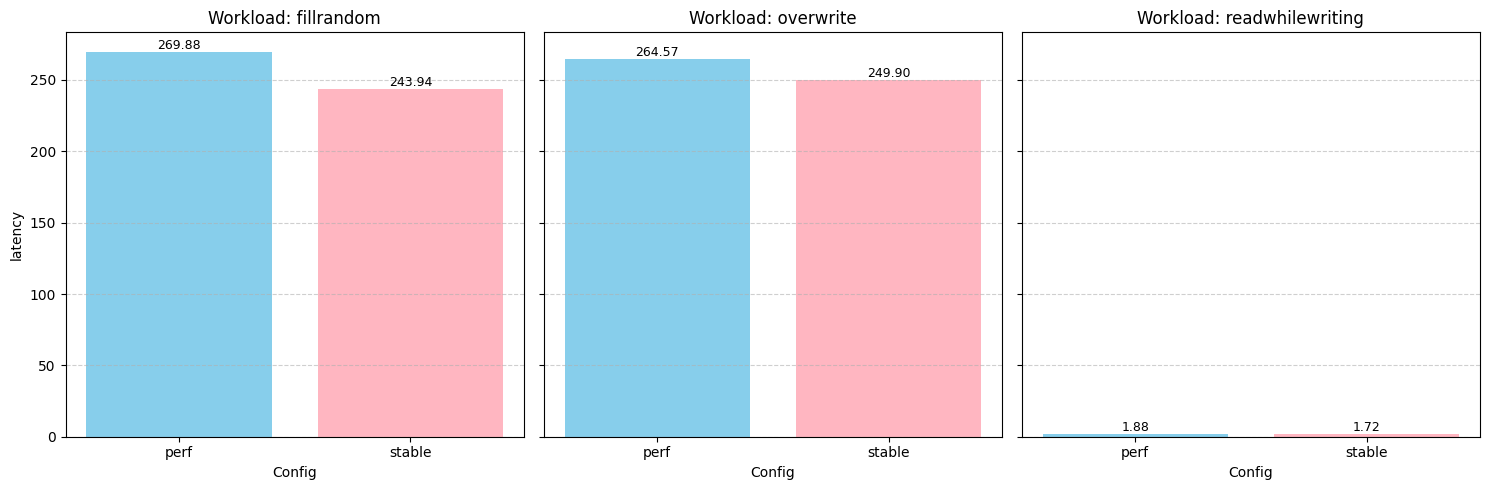

In [6]:
plot_graph(universal, target_column='latency')

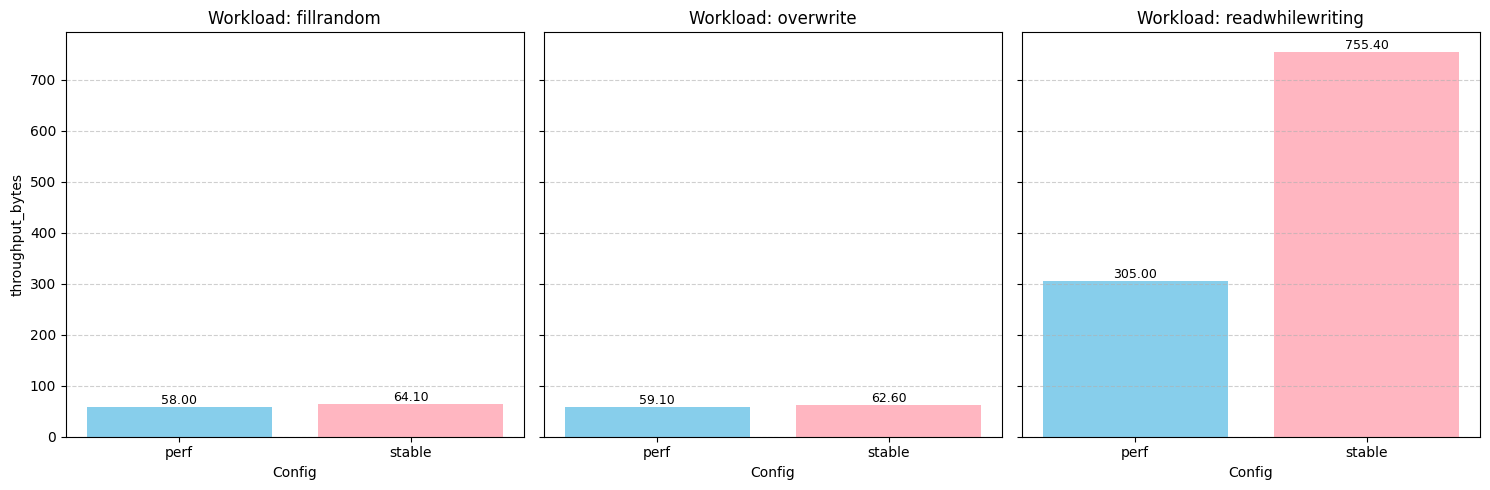

In [7]:
plot_graph(universal, target_column='throughput_bytes')

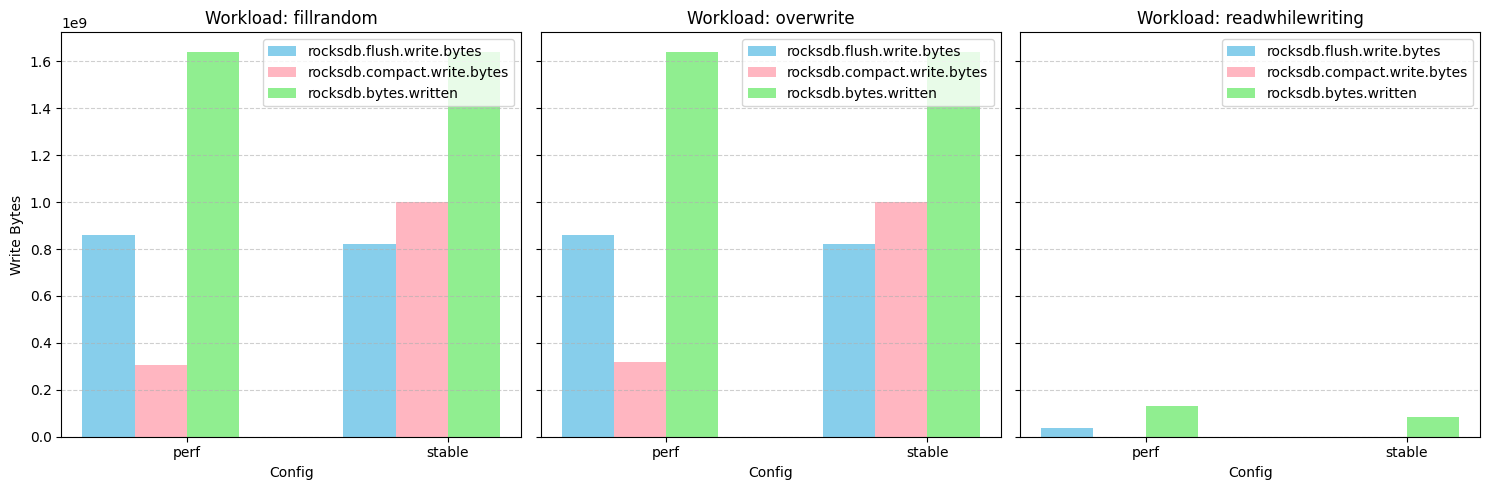

In [8]:
plot_graph2(universal)

## leveled

In [9]:
leveled = df[df['compaction_style'] == 'leveled']
leveled

,workload,compaction_style,config,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,WAF,latency,throughput_ops,throughput_bytes
0,fillrandom,leveled,perf,100000,1641700000,141354496,823240788,0,0,0.587559,171.493,5831.0,91.2
2,fillrandom,leveled,stable,100000,1641700000,1063040346,823101149,1641700000,100000,1.148895,224.795,4448.0,69.6
12,overwrite,leveled,stable,100000,1641700000,1085882756,822364925,1641700000,100000,1.162361,257.715,3880.0,60.7
15,readwhilewriting,leveled,perf,8035,131910595,0,35947141,0,0,0.272511,1.538,401648.0,261.0
16,readwhilewriting,leveled,stable,3527,57902759,0,0,57902759,3527,0.000000,1.090,3666092.0,858.4
17,overwrite,leveled,perf,100000,1641700000,168217600,822098004,0,0,0.603226,201.758,4956.0,77.5


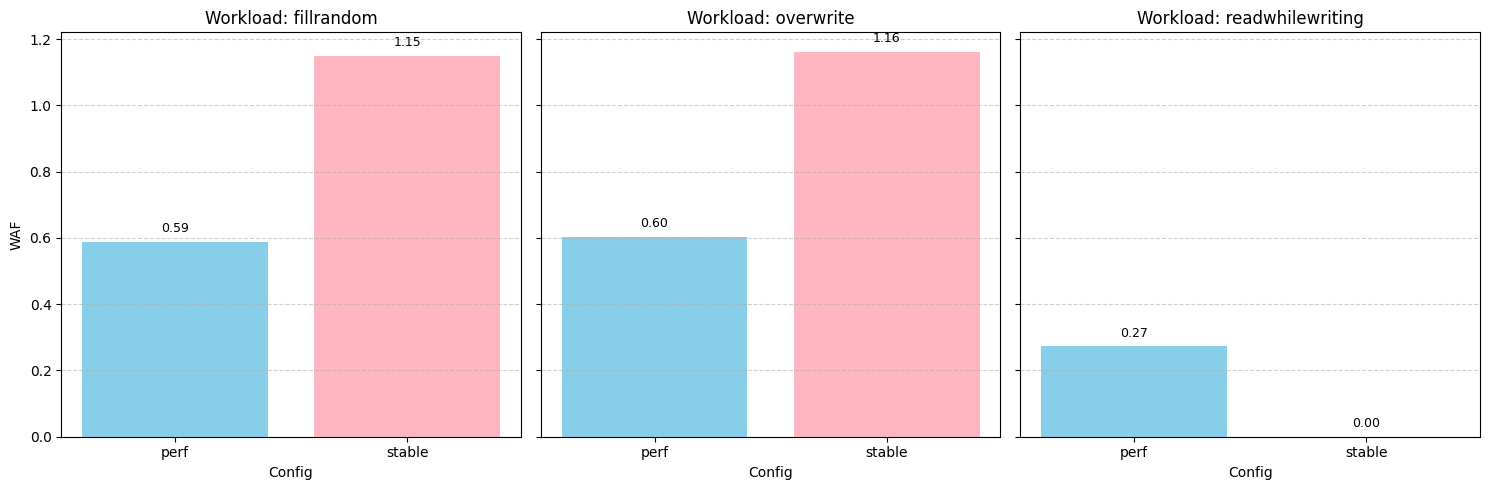

In [10]:
plot_graph(leveled)

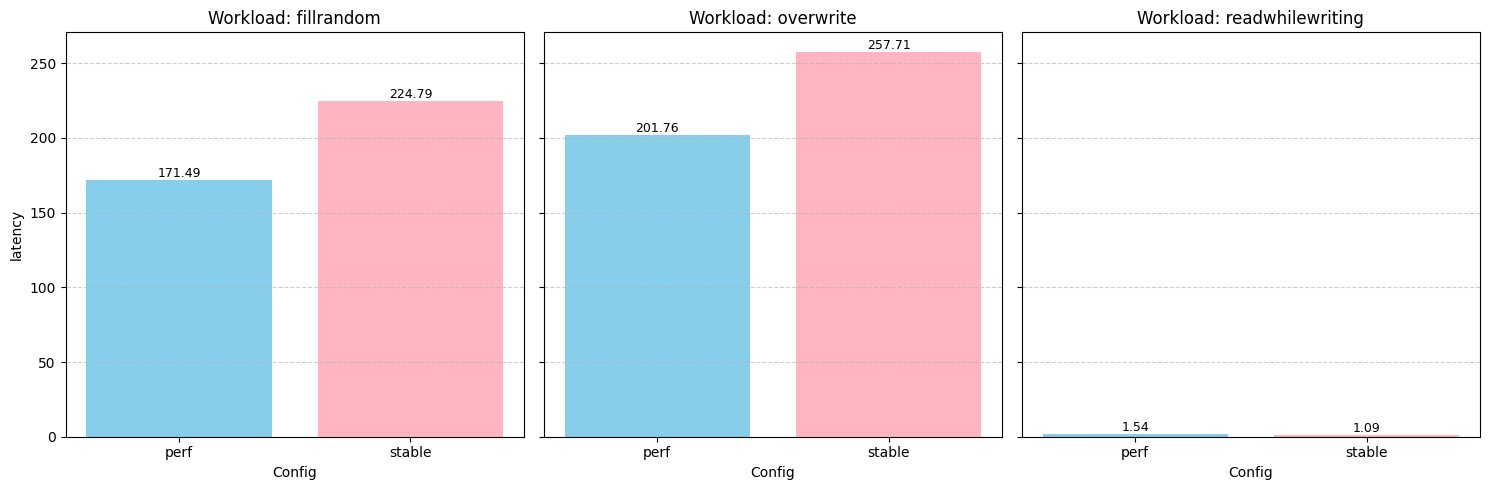

In [11]:
plot_graph(leveled, target_column='latency')

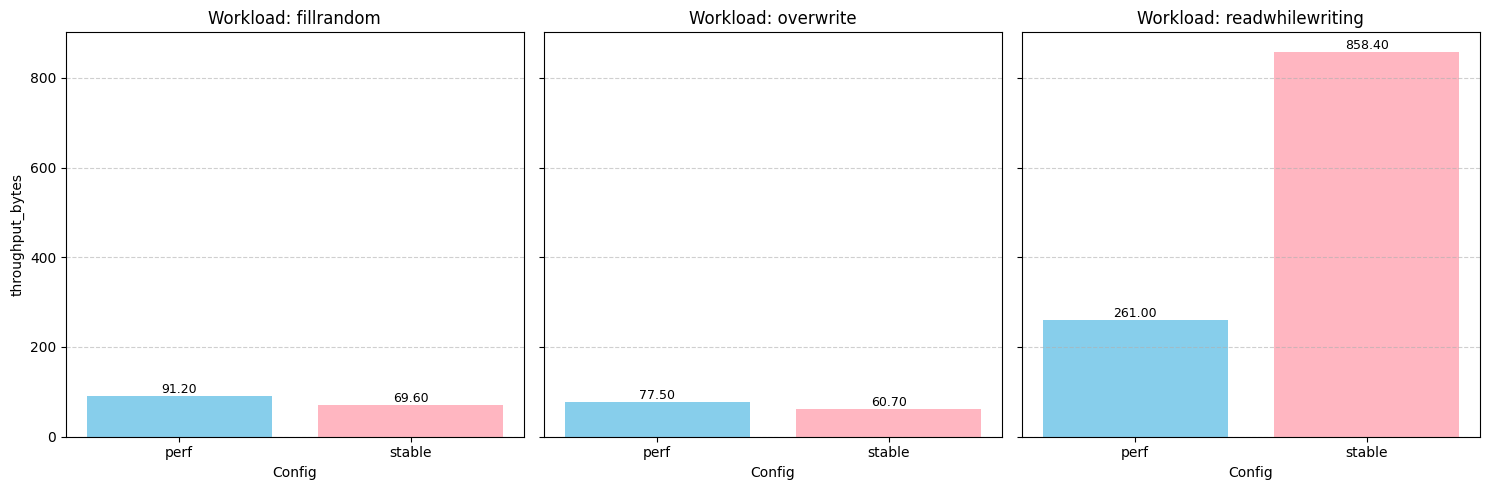

In [12]:
plot_graph(leveled, target_column='throughput_bytes')

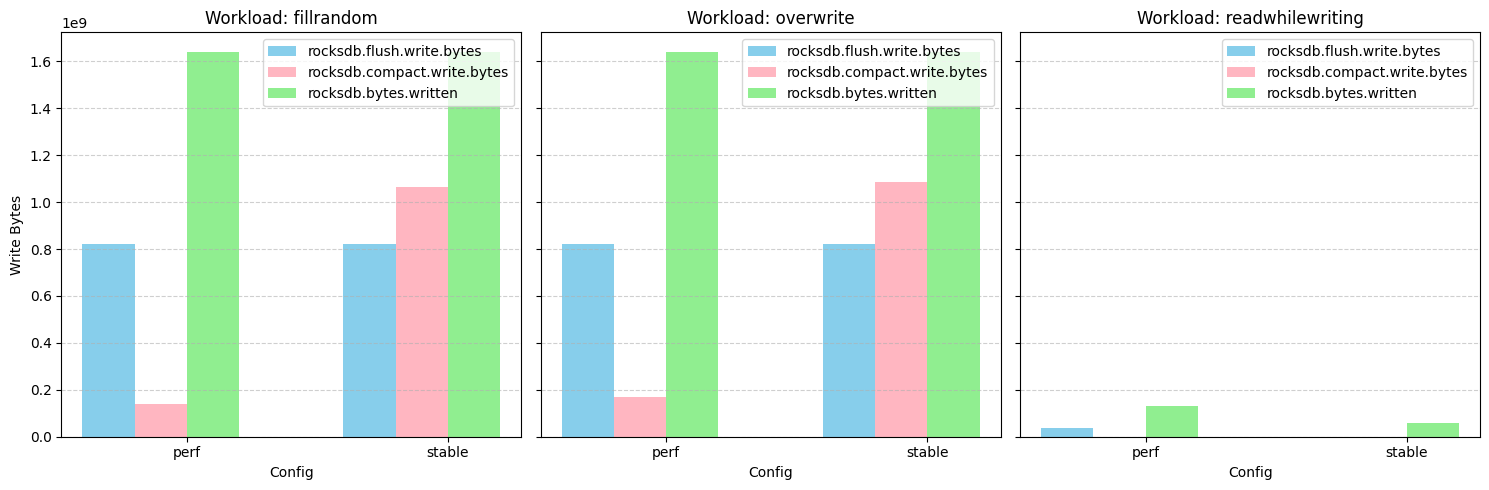

In [13]:
plot_graph2(leveled)

## FIFO

In [14]:
fifo = df[df['compaction_style'] == 'fifo']
fifo

,workload,compaction_style,config,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,WAF,latency,throughput_ops,throughput_bytes
1,overwrite,fifo,stable,100000,1641700000,0,856930432,1641700000,100000,0.521977,133.894,7468.0,116.8
3,fillrandom,fifo,perf,100000,1641700000,0,822797396,0,0,0.501186,131.218,7620.0,119.2
6,overwrite,fifo,perf,100000,1641700000,0,822333524,0,0,0.500904,146.222,6838.0,107.0
7,readwhilewriting,fifo,stable,3419,56129723,0,0,56129723,3419,0.000000,1.094,3652834.0,845.6
13,fillrandom,fifo,stable,100000,1641700000,0,822837515,1641700000,100000,0.501211,119.717,8352.0,130.6
14,readwhilewriting,fifo,perf,8035,131910595,0,35756165,0,0,0.271064,1.626,382796.0,252.0


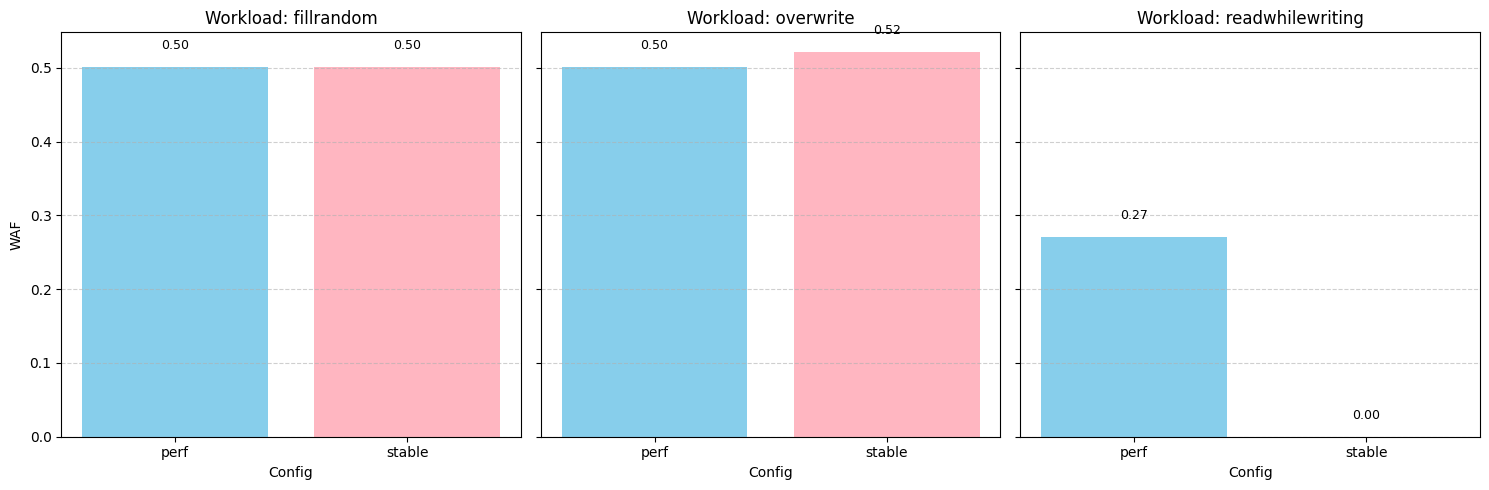

In [15]:
plot_graph(fifo)

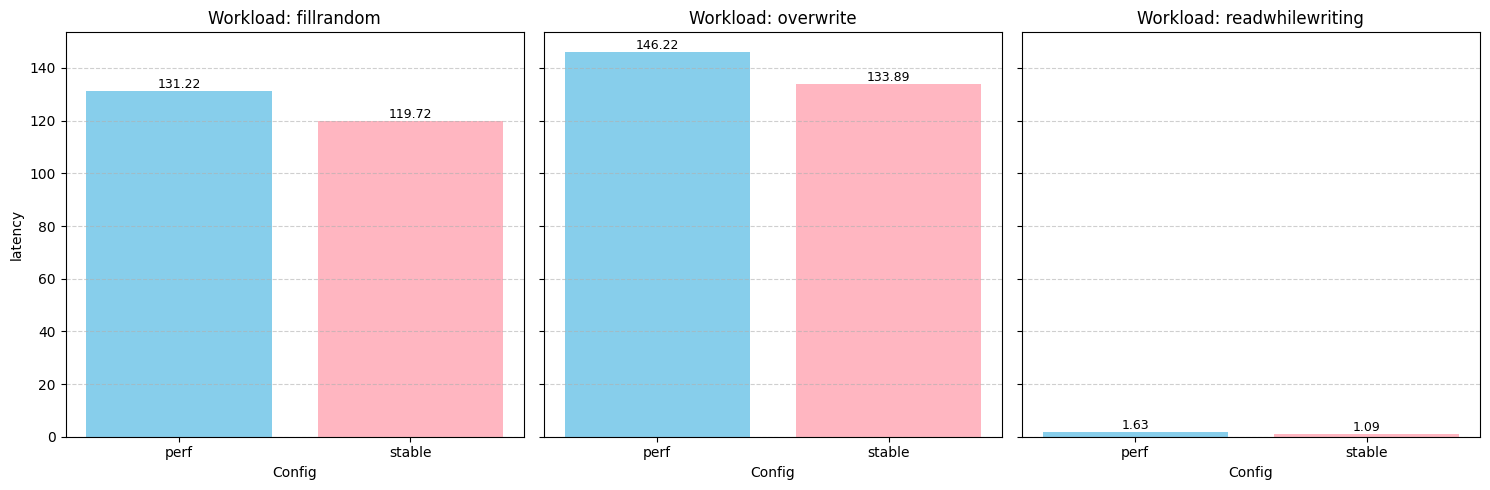

In [16]:
plot_graph(fifo, target_column='latency')

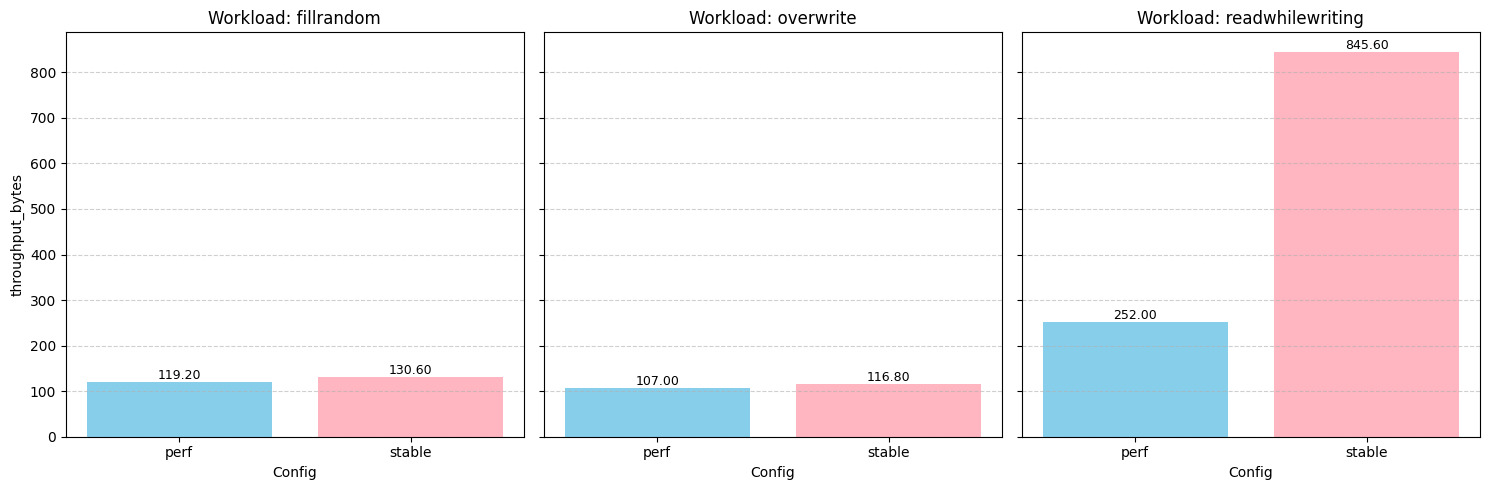

In [17]:
plot_graph(fifo, target_column='throughput_bytes')

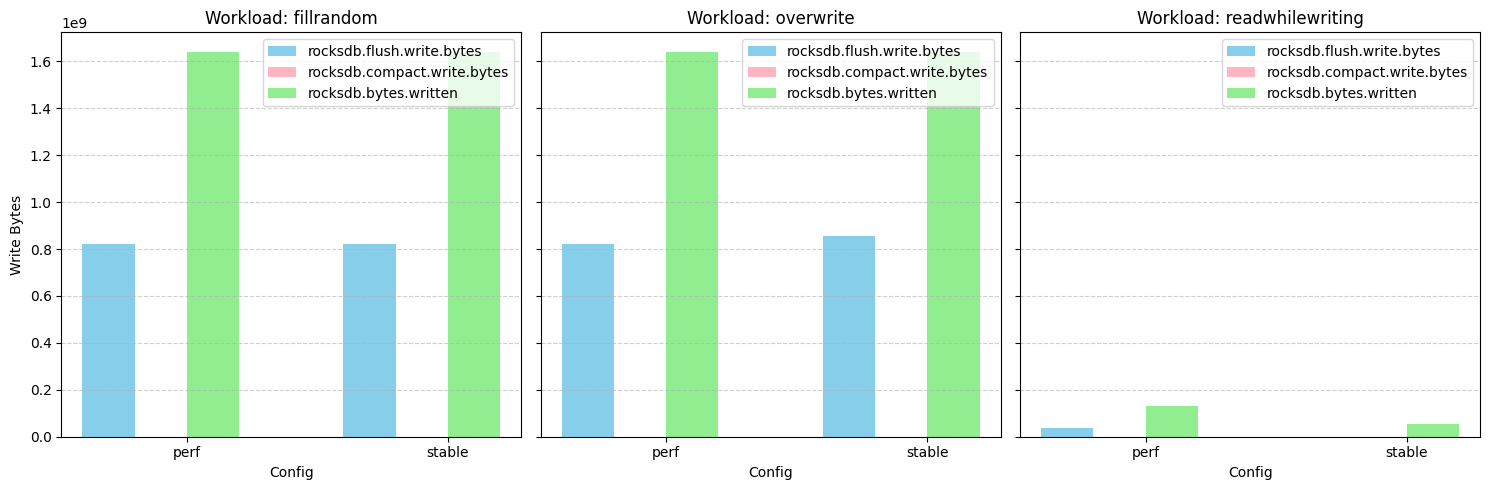

In [18]:
plot_graph2(fifo)